# Template

Dies ist ein Notebook, welches die [Hauptkomponentenanalyse](https://de.wikipedia.org/wiki/Hauptkomponentenanalyse) auf einen beliebigen Datensatz andwendet und unkommentiert die plots erstellt. Die Thesen und die Positionen wurden von der [Bundeszentrale für politische Bildung](https://www.bpb.de/) im Rahmen des [Wahl-O-Mats](https://www.bpb.de/themen/wahl-o-mat/) erstellt und veröffentlicht.

In [1]:
from IPython.display import display
from IPython.display import Markdown
import matplotlib.pyplot as plt
import numpy as np
from pca_wahl import utils
from sklearn.decomposition import PCA

In [2]:
plt.rcParams["figure.dpi"] = 200.

## Laden der Daten

In [3]:
data = utils.load_election("2021-09-26_de")

## Nutzungsbedingungen

In [4]:
print(data.note)

Hinweis zur Verwendung des Wahl-O-Mat-Datensatzes

Die Bundeszentrale für politische Bildung ist Urheber des nachfolgend veröffentlichten „Wahl-O-Mat-Datensatzes“. 
Die Veröffentlichung des Datensatzes dient lediglich dem Zugang zu den in ihm enthaltenen Informationen. 
Jede Nutzung des Datensatzes, egal welcher Art, wird untersagt. Die Schranken des Urheberrechts durch gesetzlich erlaubte Nutzung bleiben hiervon unberührt.

Eine Ausnahme gilt nur für die Analyse des Datensatzes zu wissenschaftlichen oder journalistischen Zwecken sowie für die Veröffentlichung der Ergebnisse dieser Analyse. 
Dabei muss jederzeit klar erkennbar sein, dass die Bundeszentrale für politische Bildung nicht Urheber dieser Analyse ist.

Explizit untersagt ist in diesem Rahmen die Nutzung des Datensatzes für die Erstellung von Angeboten, in deren Rahmen– ähnlich dem Wahl-O-Mat – Nutzerinnen und Nutzer sich auf Basis der eigenen Positionen ihre Nähe zu den Parteien anzeigen oder errechnen lassen können.

Bei Fr

## Disclaimer

An dieser Stelle sei erähnt, dass diese Analyse zu **wissenschaftlichen und journalistischen Zwecken** erstellt und veröffentlicht wurde. Es besteht **keine Verbindung zur Bundeszentrale für politische Bildung**.

## Bereinigung

In [5]:
remove = []

In [6]:
data = utils.remove_party_from_data(data, remove=remove)

### Hilfsvariablen

In [7]:
N_par, N_the = data.X.shape

In [8]:
N_komp = np.minimum(N_par, N_the)

In [9]:
N_max = 10
parties_short = []
for party in data.parties:
    if len(party) > N_max:
        parties_short.append(party[:N_max]+"...")
    else:
        parties_short.append(party)

## Die Thesen

In [10]:
md = []
for i in range(data.statements.shape[0]):
    md.append("* **These {:d}: {}** <br/> {}".format(i+1, data.statements[i], data.statements_long[i]))
display(Markdown("\n".join(md)))

* **These 1: Tempolimit auf Autobahnen** <br/> Auf allen Autobahnen soll ein generelles Tempolimit gelten.
* **These 2: Erhöhung der Verteidigungsausgaben** <br/> Deutschland soll seine Verteidigungsausgaben erhöhen.
* **These 3: Wählen ab 16** <br/> Bei Bundestagswahlen sollen auch Jugendliche ab 16 Jahren wählen dürfen.
* **These 4: Windenergie** <br/> Die Förderung von Windenergie soll beendet werden.
* **These 5: Begrenzung für Mieterhöhungen** <br/> Die Möglichkeiten der Vermieterinnen und Vermieter, Wohnungsmieten zu erhöhen, sollen gesetzlich stärker begrenzt werden.
* **These 6: Patentschutz für Impfstoffe** <br/> Impfstoffe gegen Covid-19 sollen weiterhin durch Patente geschützt sein.
* **These 7: Ausstieg aus der Kohleverstromung** <br/> Der für das Jahr 2038 geplante Ausstieg aus der Kohleverstromung soll vorgezogen werden.
* **These 8: Gesetzliche Rentenversicherung** <br/> Alle Erwerbstätigen sollen in der gesetzlichen Rentenversicherung versichert sein müssen.
* **These 9: Abschaffung des Familiennachzugs** <br/> Das Recht anerkannter Flüchtlinge auf Familiennachzug soll abgeschafft werden.
* **These 10: Steuer auf digitale Dienstleistungen** <br/> Auf den Umsatz, der in Deutschland mit digitalen Dienstleistungen erzielt wird, soll eine nationale Steuer erhoben werden.
* **These 11: Traditionelle Familie** <br/> Die traditionelle Familie aus Vater, Mutter und Kindern soll stärker als andere Lebensgemeinschaften gefördert werden.
* **These 12: Parteispenden** <br/> Spenden von Unternehmen an Parteien sollen weiterhin erlaubt sein.
* **These 13: Elternunabhängiges BAföG** <br/> Studentinnen und Studenten sollen BAföG unabhängig vom Einkommen ihrer Eltern erhalten.
* **These 14: Doppelte Staatsbürgerschaft** <br/> In Deutschland soll es generell möglich sein, neben der deutschen eine zweite Staatsbürgerschaft zu haben.
* **These 15: Sprachliche Berücksichtigung von Geschlechtsidentitäten** <br/> Bundesbehörden sollen in ihren Veröffentlichungen unterschiedliche Geschlechtsidentitäten sprachlich berücksichtigen.
* **These 16: Nord Stream 2** <br/> Die Ostsee-Pipeline "Nord Stream 2", die Gas von Russland nach Deutschland transportiert, soll wie geplant in Betrieb gehen dürfen.
* **These 17: Abschaffung des Solidaritätszuschlags** <br/> Der Solidaritätszuschlag soll vollständig abgeschafft werden.
* **These 18: Kopftuch im Dienst** <br/> Das Tragen eines Kopftuchs soll Beamtinnen im Dienst generell erlaubt sein.
* **These 19: Verbrennungsmotor** <br/> Die Zulassung von neuen Autos mit Verbrennungsmotor soll auch langfristig möglich sein.
* **These 20: Schulpolitik** <br/> Der Bund soll mehr Zuständigkeiten in der Schulpolitik erhalten.
* **These 21: Antisemitismus** <br/> Der Bund soll Projekte zur Bekämpfung des Antisemitismus stärker finanziell unterstützen.
* **These 22: Aufträge an chinesische Firmen** <br/> Chinesische Firmen sollen keine Aufträge für den Ausbau der Kommunikationsinfrastruktur in Deutschland erhalten dürfen.
* **These 23: Kirchensteuer** <br/> Der Staat soll weiterhin für Religionsgemeinschaften die Kirchensteuer einziehen.
* **These 24: Verkauf von Cannabis** <br/> Der kontrollierte Verkauf von Cannabis soll generell erlaubt sein.
* **These 25: Austritt aus der EU** <br/> Deutschland soll aus der Europäischen Union austreten.
* **These 26: Frauen und Männer auf Landeslisten** <br/> Die Landeslisten der Parteien für die Wahlen zum Deutschen Bundestag sollen abwechselnd mit Frauen und Männern besetzt werden müssen.
* **These 27: Abrechnung über Fallpauschalen** <br/> Stationäre Behandlungen im Krankenhaus sollen weiterhin über eine Fallpauschale abgerechnet werden. 
* **These 28: Steuer auf hohe Vermögen** <br/> Auf hohe Vermögen soll wieder eine Steuer erhoben werden.
* **These 29: Gesichtserkennung bei Videoüberwachung** <br/> Bei der Videoüberwachung öffentlicher Plätze soll Gesichtserkennungssoftware eingesetzt werden dürfen.
* **These 30: Ehepaare ohne Kinder** <br/> Auch Ehepaare ohne Kinder sollen weiterhin steuerlich begünstigt werden.
* **These 31: Ökologische Landwirtschaft** <br/> Ökologische Landwirtschaft soll stärker gefördert werden als konventionelle Landwirtschaft.
* **These 32: Islamische Verbände** <br/> Islamische Verbände sollen als Religionsgemeinschaften staatlich anerkannt werden können.
* **These 33: Anstieg des CO2-Preises** <br/> Der staatlich festgelegte Preis für den Ausstoß von CO2 beim Heizen und Autofahren soll stärker steigen als geplant.
* **These 34: Schuldenbremse** <br/> Die Schuldenbremse im Grundgesetz soll beibehalten werden.
* **These 35: Asyl nur für politisch Verfolgte** <br/> Asyl soll weiterhin nur politisch Verfolgten gewährt werden.
* **These 36: Erhöhung des Mindestlohns** <br/> Der gesetzliche Mindestlohn soll spätestens im Jahr 2022 auf mindestens 12 Euro erhöht werden.
* **These 37: Besteuerung des Flugverkehrs** <br/> Der Flugverkehr soll höher besteuert werden.
* **These 38: Homeoffice** <br/> Unternehmen sollen selbst entscheiden, ob sie ihren Beschäftigten das Arbeiten im Homeoffice erlauben.

## Korrelationsmatrix

In [11]:
P = np.corrcoef(data.X.T)

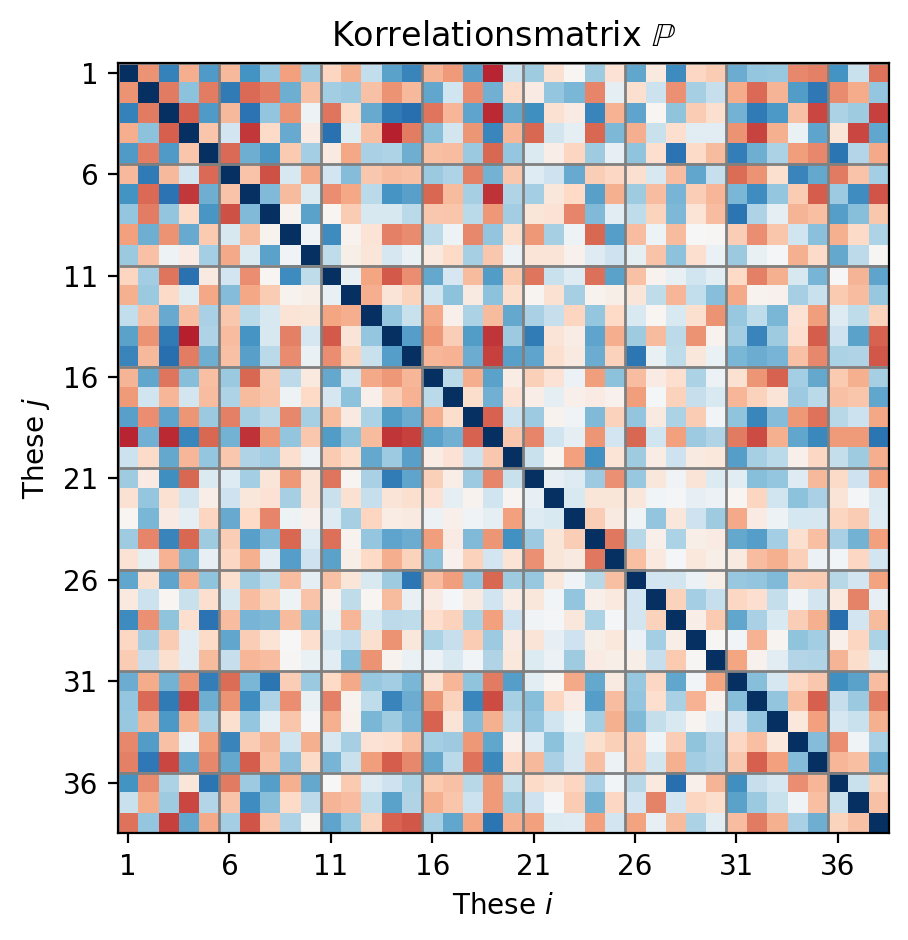

In [12]:
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.imshow(P, vmin=-1, vmax=1, cmap="RdBu")
ax.set_title("Korrelationsmatrix $\mathbb{P}$")
ticks = np.arange(0, N_the+1, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks+1)
ax.set_yticklabels(ticks+1)
ax.hlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.set_xlabel("These $i$")
ax.set_ylabel("These $j$")
fig.tight_layout()

## Kovarianzmatrix

In [13]:
covX = np.cov(data.X.T)

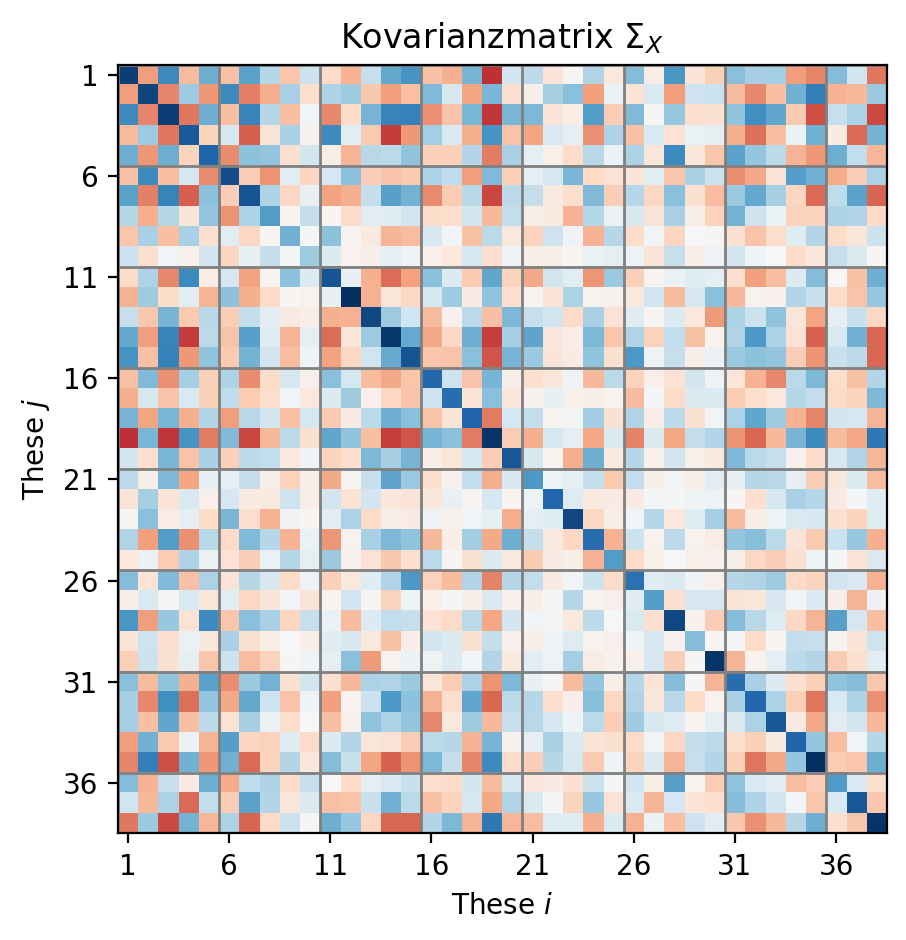

In [14]:
fig, ax = plt.subplots()
ax.set_aspect(1)
lim = np.abs(covX).max()
ax.imshow(covX, vmin=-lim, vmax=lim, cmap="RdBu")
ax.set_title("Kovarianzmatrix $\Sigma_X$")
ticks = np.arange(0, N_the+1, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks+1)
ax.set_yticklabels(ticks+1)
ax.hlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.set_xlabel("These $i$")
ax.set_ylabel("These $j$")
fig.tight_layout()

## Hauptkomponentenanalyse

In [15]:
pca = PCA()
Y = pca.fit_transform(data.X)

In [16]:
covY = np.cov(Y.T)

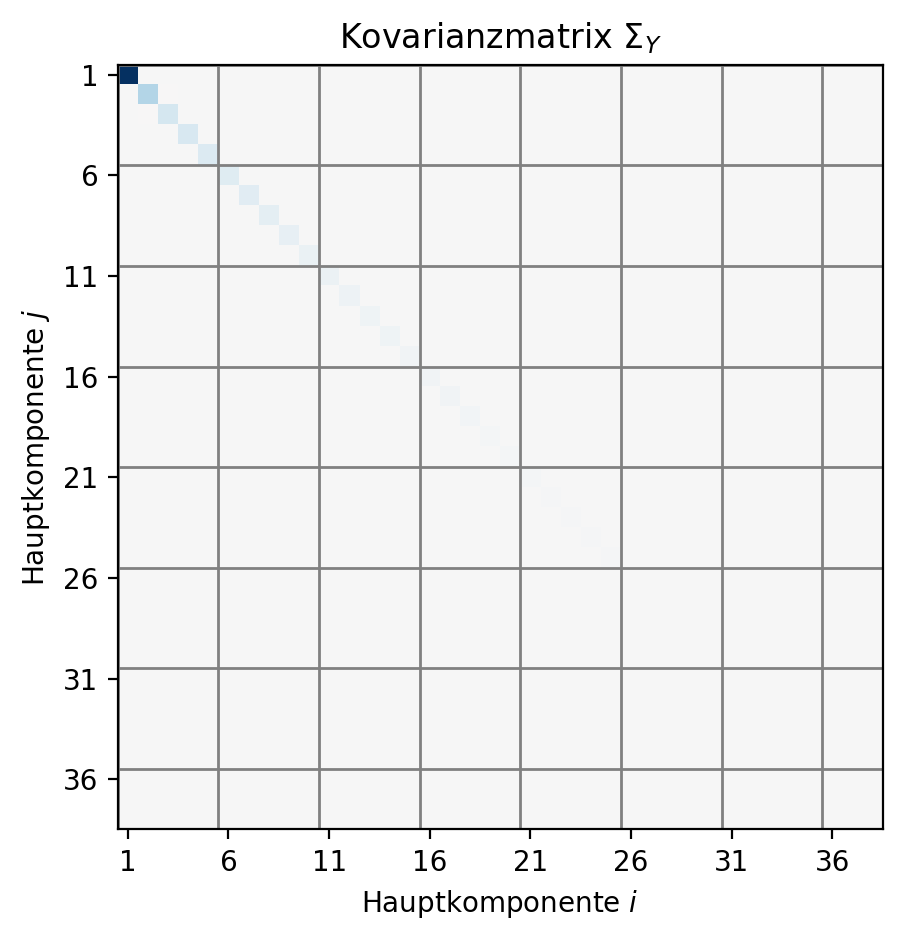

In [17]:
fig, ax = plt.subplots()
ax.set_aspect(1)
lim = np.abs(covY).max()
ax.imshow(covY, vmin=-lim, vmax=lim, cmap="RdBu")
ax.set_title("Kovarianzmatrix $\Sigma_Y$")
ticks = np.arange(0, N_komp+1, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks+1)
ax.set_yticklabels(ticks+1)
ax.hlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="gray")
ax.set_xlabel("Hauptkomponente $i$")
ax.set_ylabel("Hauptkomponente $j$")
fig.tight_layout()

### Varianzbeiträge

In [18]:
expl_var_ratio = pca.explained_variance_ratio_

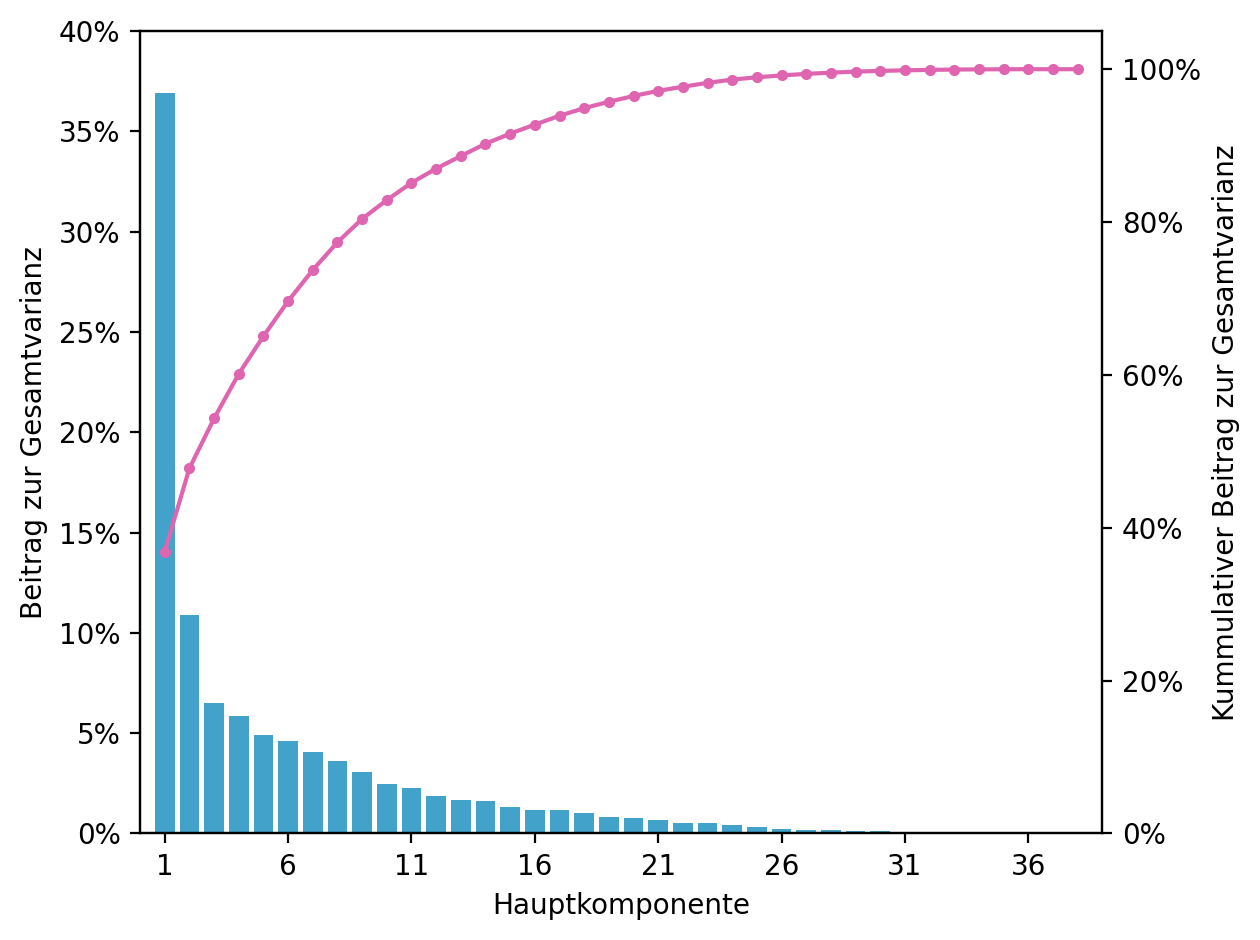

In [19]:
fig, ax = plt.subplots()
ax.bar(np.arange(N_komp)+1, expl_var_ratio, color="#43a2ca")
ax.set_xlabel("Hauptkomponente")
ax.set_ylabel("Beitrag zur Gesamtvarianz")
ax.set_xlim(0, N_komp+1)
ticks = np.arange(0, N_komp+1, 5)+1
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(["{:.0f}%".format(100*t) for t in ax.get_yticks()])
axr = ax.twinx()
axr.plot(np.arange(N_komp)+1, expl_var_ratio.cumsum(), ".-", c="#df65b0")
axr.set_ylabel("Kummulativer Beitrag zur Gesamtvarianz")
axr.set_ylim(0., 1.05)
axr.set_yticks(np.arange(0., 1.1, 0.2))
axr.set_yticklabels(["{:.0f}%".format(100*t) for t in axr.get_yticks()])
fig.tight_layout()

### Reduzierte Darstellung

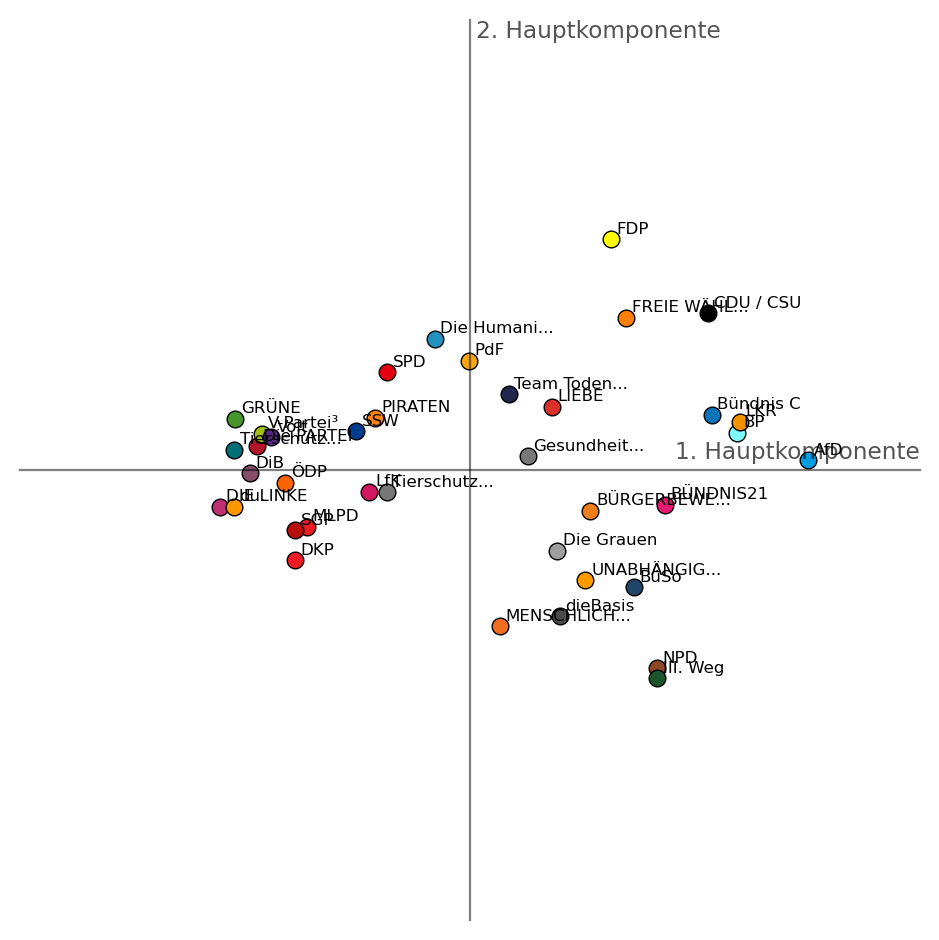

In [20]:
offset = 0.1
fig, ax = plt.subplots()
ax.set_aspect(1)
for i in range(N_par):
    ax.plot(Y[i, 0], Y[i, 1], "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
    if True:
        ax.text(Y[i, 0]+offset, Y[i, 1]+offset, parties_short[i], fontsize=6)
lim = np.ceil(np.abs(Y).max())+1
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xticks([])
ax.set_yticks([])
if True:
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.text(lim, 0.1, "1. Hauptkomponente", va="bottom", ha="right", fontsize="small", alpha=0.67)
    ax.text(0.1, lim, "2. Hauptkomponente", va="top", ha="left", fontsize="small", alpha=0.67)
else:
    ax.axis("off")
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.tight_layout()

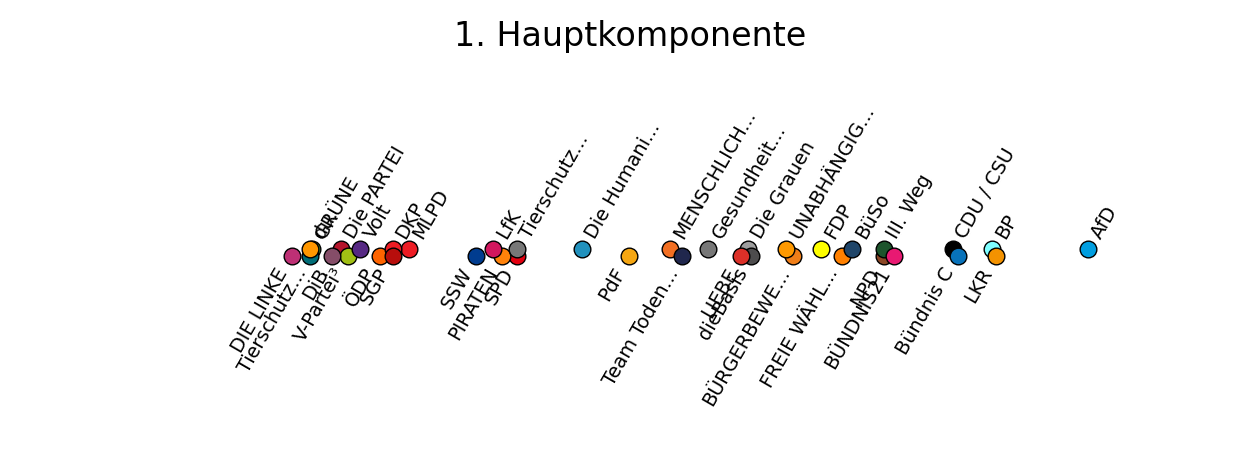

In [21]:
fig, ax = plt.subplots()
ax.set_aspect(1.)
i_sorted = np.argsort(Y[:, 0])
for i in range(N_par):
    up = (i==i_sorted).argmax()%2
    if up:
        ax.plot(Y[i, 0], 0.05, "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
        ax.text(Y[i, 0], 0.15, parties_short[i], rotation=60, ha="left", va="bottom", fontsize="x-small")
    else:
        ax.plot(Y[i, 0], -0.05, "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
        ax.text(Y[i, 0], -0.15, parties_short[i], rotation=60, ha="right", va="top", fontsize="x-small")
lim = np.ceil(np.abs(Y).max())+1
ax.set_xlim(-lim, lim)
ax.set_ylim(-2.5, 2.5)
ax.axis("off")
ax.set_title("1. Hauptkomponente")
fig.tight_layout()

### Beiträge zu den Hauptkomponenten

In [22]:
komp_the = np.empty((N_komp, N_the))
i_sorted = np.empty((N_komp, N_the), dtype=int)
for i in range(N_komp):
    komp_the[i, :] = (1. - data.X.mean(0)) * pca.components_.T[:, i]
    i_sorted[i, :] = komp_the[i, :].argsort()
    komp_the[i, :] = komp_the[i, :][i_sorted[i, :]]

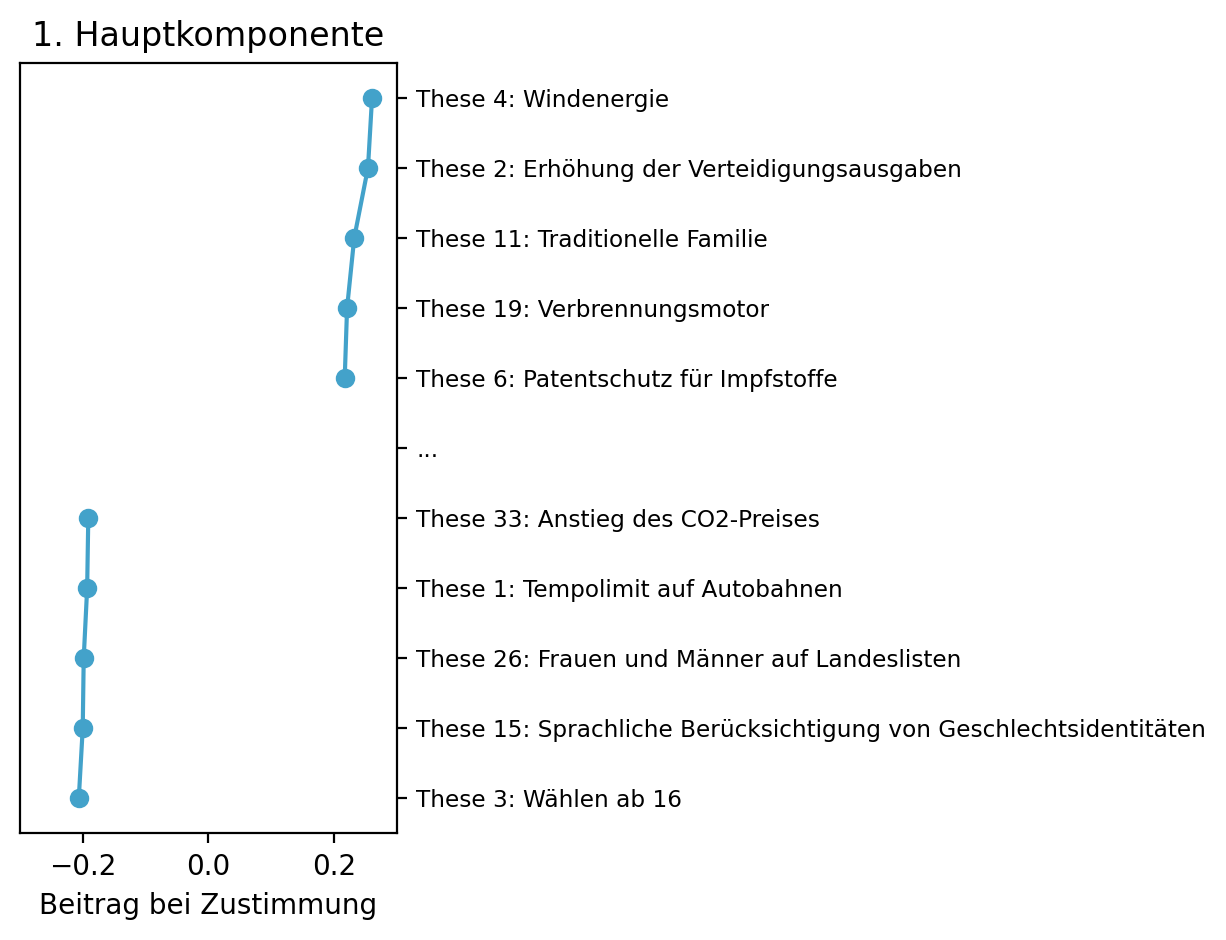

In [23]:
N_cut, N_pad = 5, 1
N_k = 1
lim = np.ceil(np.abs(10.*komp_the[N_k-1, :])).max()/10.
fig, ax = plt.subplots()
ax.plot(komp_the[N_k-1, :N_cut], np.arange(2*N_cut+N_pad)[:N_cut], "o-",  markersize=6, c="#43a2ca")
ax.plot(komp_the[N_k-1, -N_cut:], np.arange(2*N_cut+N_pad)[-N_cut:], "o-",  markersize=6, c="#43a2ca")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks(np.arange(2*N_cut+N_pad))
i_labels = list(i_sorted[N_k-1, :N_cut]) + list(i_sorted[N_k-1, -N_cut:])
ticklabels = ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[:N_cut]] + N_pad*["..."] + ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[-N_cut:]]
ax.set_yticklabels(ticklabels, fontsize="small")
ax.set_xlabel("Beitrag bei Zustimmung")
ax.set_xlim(-lim, lim)
ax.set_title("{:d}. Hauptkomponente".format(N_k))
fig.tight_layout()

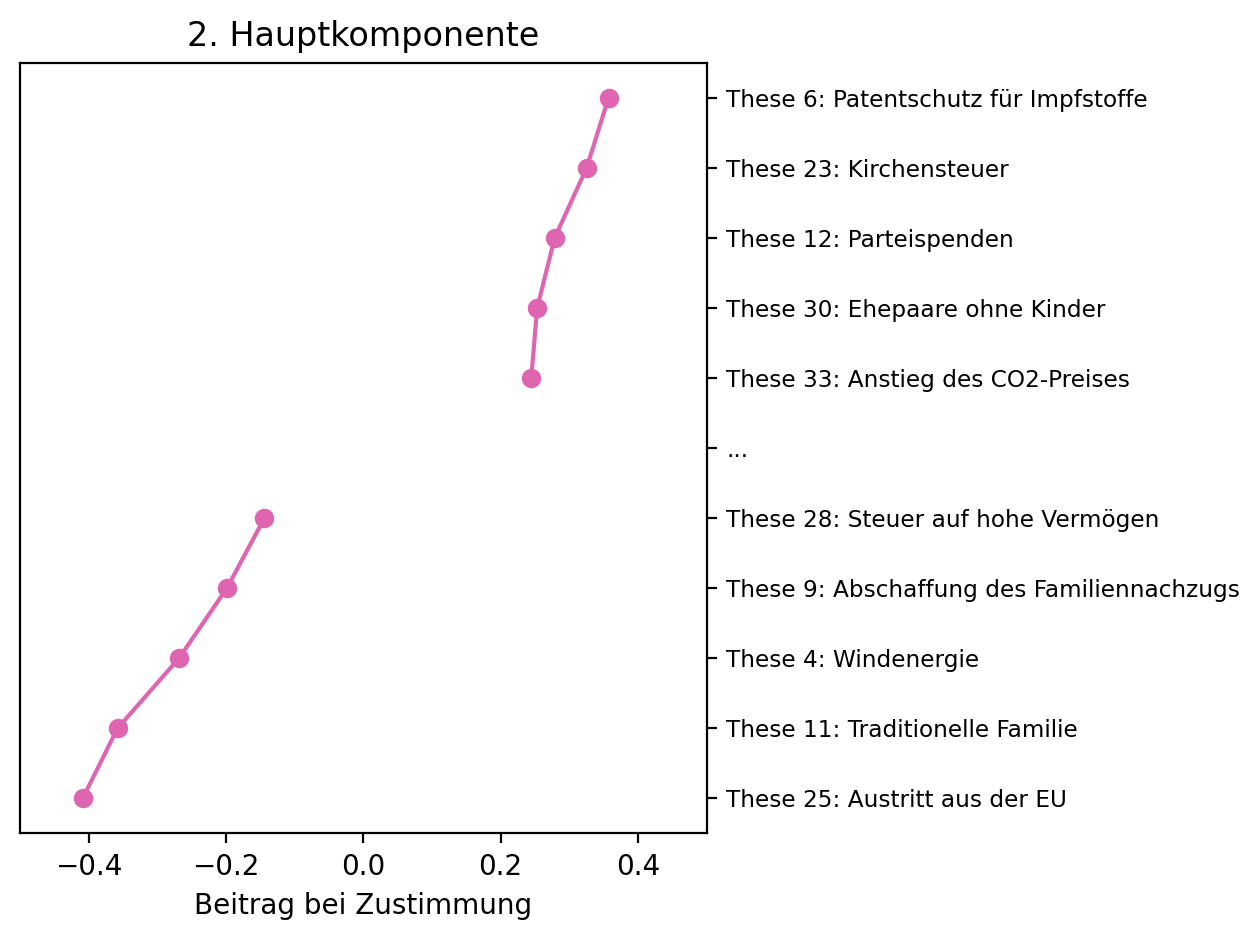

In [24]:
N_cut, N_pad = 5, 1
N_k = 2
lim = np.ceil(np.abs(10.*komp_the[N_k-1, :])).max()/10.
fig, ax = plt.subplots()
ax.plot(komp_the[N_k-1, :N_cut], np.arange(2*N_cut+N_pad)[:N_cut], "o-",  markersize=6, c="#df65b0")
ax.plot(komp_the[N_k-1, -N_cut:], np.arange(2*N_cut+N_pad)[-N_cut:], "o-",  markersize=6, c="#df65b0")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks(np.arange(2*N_cut+N_pad))
i_labels = list(i_sorted[N_k-1, :N_cut]) + list(i_sorted[N_k-1, -N_cut:])
ticklabels = ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[:N_cut]] + N_pad*["..."] + ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[-N_cut:]]
ax.set_yticklabels(ticklabels, fontsize="small")
ax.set_xlabel("Beitrag bei Zustimmung")
ax.set_xlim(-lim, lim)
ax.set_title("{:d}. Hauptkomponente".format(N_k))
fig.tight_layout()

## Übereinstimmung der Parteien zueinander

In [25]:
norm = np.empty((N_par, N_par))
i_sorted = np.argsort(Y[:, 0])
for i, ii in enumerate(i_sorted):
    for j, jj in enumerate(i_sorted):
        if i==j:
            norm[i, i] = np.nan
            continue
        norm[i, j] = np.linalg.norm(data.X[ii, :]-data.X[jj, :])
        norm[j, i] = norm[i, j]
norm_max = 2.*N_the**0.5
norm = (norm_max-norm) / norm_max
norm_min = norm[np.where(~np.isnan(norm))].min()
norm_max = norm[np.where(~np.isnan(norm))].max()

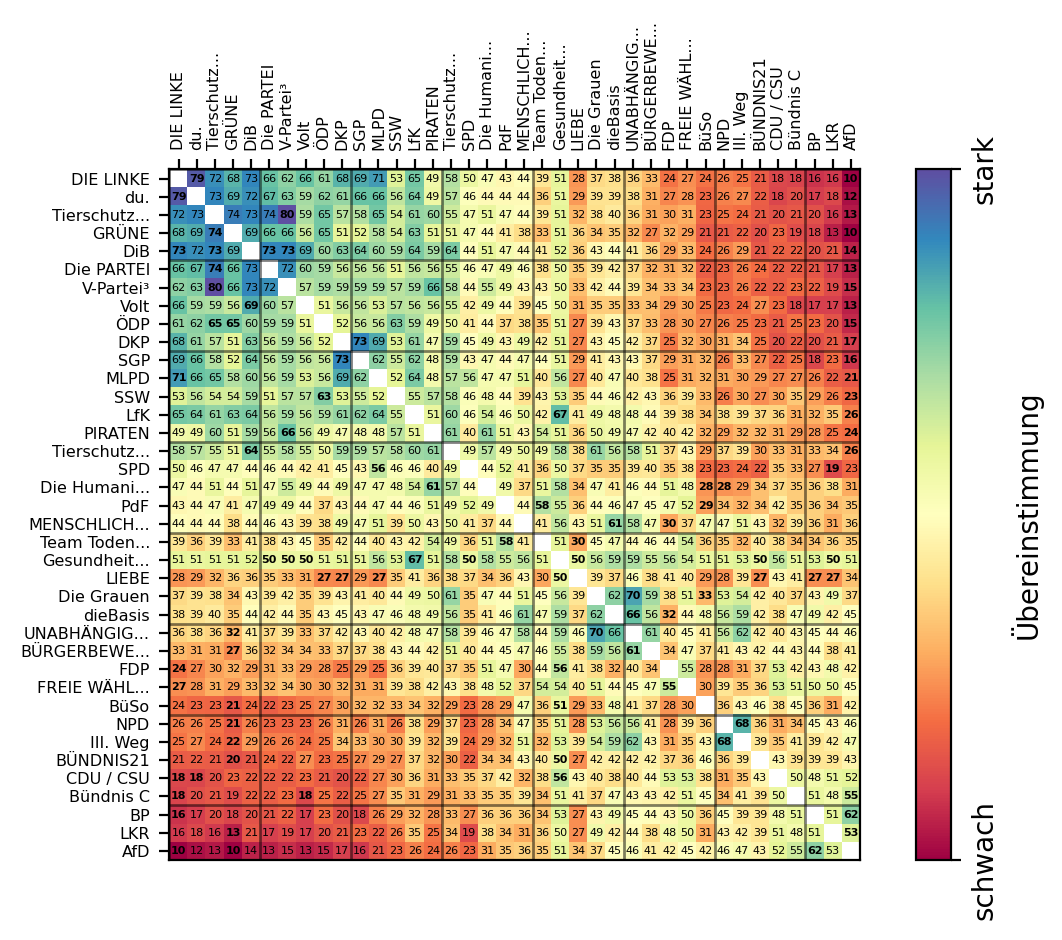

In [26]:
fig, ax = plt.subplots()
ax.set_aspect(1)
p = ax.matshow(norm, vmin=norm_min, vmax=norm_max, cmap="Spectral")
ax.set_xticks(np.arange(N_par))
ax.set_yticks(np.arange(N_par))
ax.set_xticklabels(np.array(parties_short)[i_sorted], rotation=90, fontsize="xx-small")
ax.set_yticklabels(np.array(parties_short)[i_sorted], fontsize="xx-small")
ticks = np.arange(0, N_par, 5)
ax.xaxis.tick_top()
ax.hlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="black", alpha=0.5)
ax.vlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="black", alpha=0.5)
cbar = plt.colorbar(p, ticks=[norm_min, norm_max])
cbar.set_label("Übereinstimmung")
cbar.set_ticklabels(["schwach", "stark"], rotation=90, va="center")
if True:
    for i in range(N_par):
        for j in range(N_par):
            if j==i:
                continue
            nmax = np.round(norm[np.where(np.isfinite(norm[:, j])), j].max(), 2)
            nmin = np.round(norm[np.where(np.isfinite(norm[:, j])), j].min(), 2)
            if np.round(norm[i, j], 2)==nmin or np.round(norm[i, j], 2)==nmax:
                fontweight="bold"
            else:
                fontweight="normal"
            ax.text(i, j, "{:.0f}".format(norm[i, j]*100), fontsize=4, va="center", ha="center", fontweight=fontweight)
fig.tight_layout()